In [557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.metrics import r2_score
import statsmodels.api as sm
import joblib

import warnings
warnings.filterwarnings("ignore")

In [558]:
df = pd.read_csv('/Users/saptarshipal/DATA/ipl_dataset2013/data/IPL IMB381IPL2013.csv')

df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [559]:
df.shape

(130, 26)

In [560]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [562]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl.NO.,130.0,65.500000,37.671829,1.0,33.2500,65.500,97.7500,130.00
AGE,130.0,2.092308,0.576627,1.0,2.0000,2.000,2.0000,3.00
T-RUNS,130.0,2166.715385,3305.646757,0.0,25.5000,542.500,3002.2500,15470.00
T-WKTS,130.0,66.530769,142.676855,0.0,0.0000,7.000,47.5000,800.00
ODI-RUNS-S,130.0,2508.738462,3582.205625,0.0,73.2500,835.000,3523.5000,18426.00
ODI-SR-B,130.0,71.164385,25.898440,0.0,65.6500,78.225,86.7900,116.66
ODI-WKTS,130.0,76.076923,111.205070,0.0,0.0000,18.500,106.0000,534.00
ODI-SR-BL,130.0,34.033846,26.751749,0.0,0.0000,36.600,45.3250,150.00
CAPTAINCY EXP,130.0,0.315385,0.466466,0.0,0.0000,0.000,1.0000,1.00
RUNS-S,130.0,514.246154,615.226335,0.0,39.0000,172.000,925.2500,2254.00


In [563]:
df1 = df.copy()
df1.shape

(130, 26)

In [564]:
df2 = df1.drop(columns=['Sl.NO.'])
df2.columns

Index(['PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS',
       'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [565]:
df2.isnull().sum()

PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

In [566]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,130.0,2.092308,0.576627,1.0,2.0000,2.000,2.0000,3.00
T-RUNS,130.0,2166.715385,3305.646757,0.0,25.5000,542.500,3002.2500,15470.00
T-WKTS,130.0,66.530769,142.676855,0.0,0.0000,7.000,47.5000,800.00
ODI-RUNS-S,130.0,2508.738462,3582.205625,0.0,73.2500,835.000,3523.5000,18426.00
ODI-SR-B,130.0,71.164385,25.898440,0.0,65.6500,78.225,86.7900,116.66
ODI-WKTS,130.0,76.076923,111.205070,0.0,0.0000,18.500,106.0000,534.00
ODI-SR-BL,130.0,34.033846,26.751749,0.0,0.0000,36.600,45.3250,150.00
CAPTAINCY EXP,130.0,0.315385,0.466466,0.0,0.0000,0.000,1.0000,1.00
RUNS-S,130.0,514.246154,615.226335,0.0,39.0000,172.000,925.2500,2254.00
HS,130.0,47.430769,36.403624,0.0,16.0000,35.500,73.7500,158.00


<Axes: ylabel='AGE'>

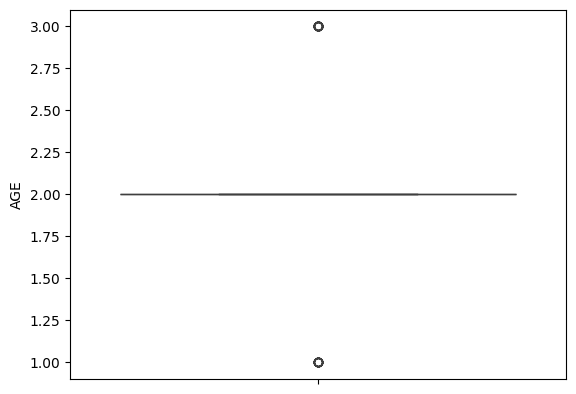

In [567]:
sns.boxplot(df2['AGE'])

In [568]:
df2['AGE'].unique()

array([2, 1, 3])

In [537]:
df2.columns[df2.dtypes =='object']

Index(['PLAYER NAME', 'COUNTRY', 'TEAM', 'PLAYING ROLE'], dtype='object')

In [538]:
for column in df2.columns[df2.dtypes =='object']:
    print(str(column) + ' has ' +str(df2[column].nunique())+" unique values")

PLAYER NAME has 130 unique values
COUNTRY has 10 unique values
TEAM has 17 unique values
PLAYING ROLE has 4 unique values


In [539]:
encoder = LabelEncoder()
df2['COUNTRY'] = encoder.fit_transform(df2['COUNTRY'])
df2['TEAM'] = encoder.fit_transform(df2['TEAM'])
df2['PLAYING ROLE'] = encoder.fit_transform(df2['PLAYING ROLE'])
df2.drop(columns='PLAYER NAME',inplace =True)
df2.head()

,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,2,6,9,0,0,0,0,0.00,0,0.0,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,1,13,2,214,18,657,71.41,185,37.6,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,2,3,6,2,571,58,1269,80.62,288,32.9,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,1,3,0,2,284,31,241,84.56,51,36.8,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,2,3,0,1,63,0,79,45.93,0,0.0,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [540]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            130 non-null    int64  
 1   COUNTRY        130 non-null    int64  
 2   TEAM           130 non-null    int64  
 3   PLAYING ROLE   130 non-null    int64  
 4   T-RUNS         130 non-null    int64  
 5   T-WKTS         130 non-null    int64  
 6   ODI-RUNS-S     130 non-null    int64  
 7   ODI-SR-B       130 non-null    float64
 8   ODI-WKTS       130 non-null    int64  
 9   ODI-SR-BL      130 non-null    float64
 10  CAPTAINCY EXP  130 non-null    int64  
 11  RUNS-S         130 non-null    int64  
 12  HS             130 non-null    int64  
 13  AVE            130 non-null    float64
 14  SR-B           130 non-null    float64
 15  SIXERS         130 non-null    int64  
 16  RUNS-C         130 non-null    int64  
 17  WKTS           130 non-null    int64  
 18  AVE-BL    

<Axes: >

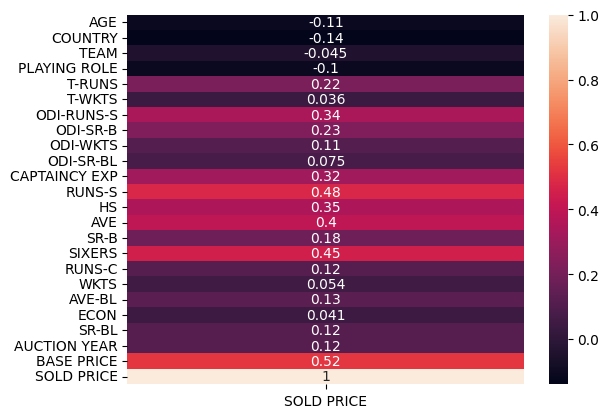

In [541]:
df3 = df2.copy()
sns.heatmap(df3.corr()[['SOLD PRICE']],annot = True)

In [542]:
df3.corr()[['SOLD PRICE']].sort_values(by = ['SOLD PRICE'])

,SOLD PRICE
COUNTRY,-0.139038
AGE,-0.106201
PLAYING ROLE,-0.103657
TEAM,-0.045134
T-WKTS,0.035767
ECON,0.040679
WKTS,0.053796
ODI-SR-BL,0.075408
ODI-WKTS,0.112327
RUNS-C,0.116476


In [543]:

#df4 = df3.copy()
#df4 = df3.drop(columns = ['TEAM','T-WKTS','ODI-SR-BL','WKTS','ECON'])
df4 = df3.drop(columns = ['AGE','COUNTRY','TEAM','PLAYING ROLE','T-WKTS','WKTS','ECON'])
df4.columns

Index(['T-RUNS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'AVE-BL', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE'],
      dtype='object')

In [544]:
X = df4.drop(columns = 'SOLD PRICE')
y = df4['SOLD PRICE']

print(X.shape,y.shape)

(130, 16) (130,)


In [545]:
y = pd.DataFrame(y)
y.shape

(130, 1)

In [546]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=432,shuffle=True)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(104, 16) (26, 16) (104, 1) (26, 1)


In [547]:
#MinMAx Scaler

scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_train_sc

array([[0.01383323, 0.03565614, 0.61212069, ..., 0.        , 0.        ,
        0.02255639],
       [0.06464124, 0.05470531, 0.63860792, ..., 0.        , 0.        ,
        0.13533835],
       [0.24854557, 0.18419624, 0.76135779, ..., 0.32934132, 0.33333333,
        0.69924812],
       ...,
       [0.        , 0.00189949, 1.        , ..., 0.21287425, 0.        ,
        0.06015038],
       [0.10252101, 0.24329751, 0.68069604, ..., 0.26946108, 0.        ,
        0.11654135],
       [0.07201034, 0.0428742 , 0.6304646 , ..., 0.21217565, 0.        ,
        0.13533835]])

In [548]:
X_train_sc = pd.DataFrame(X_train_sc,columns = X_train.columns)
X_train_sc

,T-RUNS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,AVE-BL,SR-BL,AUCTION YEAR,BASE PRICE
0,0.013833,0.035656,0.612121,0.346442,0.250667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014684,0.000000,0.000000,0.000000,0.022556
1,0.064641,0.054705,0.638608,0.000000,0.000000,0.0,0.546140,0.539062,0.481740,0.525882,0.217054,0.000000,0.000000,0.000000,0.000000,0.135338
2,0.248546,0.184196,0.761358,0.316479,0.221333,1.0,0.027507,0.187500,0.618639,0.496751,0.015504,0.053165,0.415677,0.329341,0.333333,0.699248
3,0.035941,0.056551,0.723813,0.249064,0.222000,0.0,0.078527,0.304688,0.353223,0.611066,0.069767,0.263291,0.152494,0.155289,0.000000,0.097744
4,0.239948,0.261533,0.738642,0.000000,0.000000,1.0,0.916149,0.726562,0.664738,0.547369,0.248062,0.000000,0.000000,0.000000,0.000000,0.150376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.007498,0.005644,0.368335,0.129213,0.247333,0.0,0.023070,0.078125,0.069248,0.290543,0.007752,0.957975,0.202454,0.197405,0.000000,0.135338
100,0.078798,0.078530,0.707955,0.078652,0.286667,0.0,0.166815,0.507812,0.500299,0.523504,0.093023,0.271899,0.283452,0.262774,1.000000,0.210526
101,0.000000,0.001899,1.000000,0.001873,1.000000,0.0,0.015972,0.125000,0.179605,0.509576,0.015504,0.212152,0.276485,0.212874,0.000000,0.060150
102,0.102521,0.243298,0.680696,0.256554,0.297333,0.0,0.058119,0.281250,0.373379,0.418277,0.023256,0.139747,0.273159,0.269461,0.000000,0.116541


In [549]:
X_test_sc = scaler.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc,columns = X_test.columns)

y_train_sc = scaler.fit_transform(y_train)
y_train_sc = pd.DataFrame(y_train_sc,columns = y_train.columns)

y_test_sc = scaler.fit_transform(y_test)
y_test_sc = pd.DataFrame(y_test_sc,columns = y_test.columns)

In [550]:


def evaluate_regressors(X_train_sc,X_test_sc,y_train_sc,y_test_sc):

    models = {'lr':LinearRegression()
            ,'ridge':Ridge()
            ,'lasso':Lasso()
            ,'ElasticNet':ElasticNet()
            ,'SGDRegressor':SGDRegressor()
            ,'BayesianRidge':BayesianRidge()
            ,'DecisionTreeRegressor':DecisionTreeRegressor()
            ,'RandomForestRegressor':RandomForestRegressor()
            ,'ExtraTreesRegressor':ExtraTreesRegressor()
            ,'KNeighborsRegressor':KNeighborsRegressor()
            ,'SVR':SVR()
            ,'GaussianProcessRegressor':GaussianProcessRegressor()}

    results=[]
    for name,model in models.items():
        
        model.fit(X_train_sc, y_train_sc)
        y_pred = model.predict(X_test_sc)
        score = r2_score(y_test_sc,y_pred)
        results.append({"Model":name,"Score":score})
    
    df_results = pd.DataFrame(results).sort_values(by=['Score',],ascending=False, ignore_index= True)
    return df_results

df_scores = evaluate_regressors(X_train_sc,X_test_sc,y_train_sc,y_test_sc)
print(df_scores)



                       Model     Score
0               SGDRegressor  0.257247
1        KNeighborsRegressor  0.064579
2                      lasso -0.044480
3                 ElasticNet -0.044480
4        ExtraTreesRegressor -0.683341
5                      ridge -0.772539
6                        SVR -0.919509
7              BayesianRidge -1.801399
8                         lr -2.907260
9      RandomForestRegressor -3.114139
10     DecisionTreeRegressor -3.920269
11  GaussianProcessRegressor -4.154788


In [551]:
print("The best model is "+str(df_scores.iloc[0,0])+ " with the rmse of "+str(df_scores.iloc[0,1]))

The best model is SGDRegressor with the rmse of 0.25724748838029776


In [552]:

selected_model = SGDRegressor()
selected_model.fit(X_train_sc,y_train_sc)
y_predict = pd.DataFrame(selected_model.predict(X_test_sc))

#print(X_train_sc.shape,y_train_sc.shape,y_predict.shape)

predictions = scaler.inverse_transform(y_predict)
predictions = pd.DataFrame(predictions)
#print(type(predictions),type(y_test))
pred_comparison = pd.concat([predictions,y_test],axis =1)

print(pred_comparison)



                 0  SOLD PRICE
0    728578.923719     50000.0
1    546650.693962         NaN
2    539280.428826         NaN
3    730296.805742    850000.0
4    823840.276159         NaN
5    712876.340805     50000.0
6    767074.238509    500000.0
7    965787.205011         NaN
8    580613.707879         NaN
9    461720.930833    450000.0
10   468191.127841         NaN
11   543407.554714         NaN
12   475768.460405         NaN
13   547429.731596         NaN
14   298458.533720         NaN
15   606103.640737         NaN
16   946650.042545         NaN
17   547171.548558    375000.0
18   519951.737876    500000.0
19   597866.425671         NaN
20   259994.387942         NaN
21   564592.591436         NaN
22   715654.192201         NaN
23   473299.814291         NaN
24   698937.424547         NaN
25   540477.345926         NaN
84             NaN    550000.0
109            NaN    125000.0
77             NaN    675000.0
122            NaN    450000.0
60             NaN    700000.0
120     

In [553]:
sc = []

for i in range(2,15):
    
    cv_score = cross_val_score(selected_model,X_train_sc,y_train,cv=i)
    sc.append({'cv':i,'score':cv_score.mean()})

cv_score_df = pd.DataFrame(sc).sort_values(by='score',ascending=False, ignore_index= True)
print(cv_score_df)
print("\nThe cv with the best score is "+str(cv_score_df.iloc[0,0]))
    

    cv     score
0    7  0.275018
1    4  0.259304
2   11  0.255475
3    9  0.225806
4    5  0.209746
5   13  0.170578
6    8  0.163329
7    2  0.137306
8    3  0.125367
9   12  0.108988
10  10  0.035706
11  14  0.030624
12   6  0.021339

The cv with the best score is 7


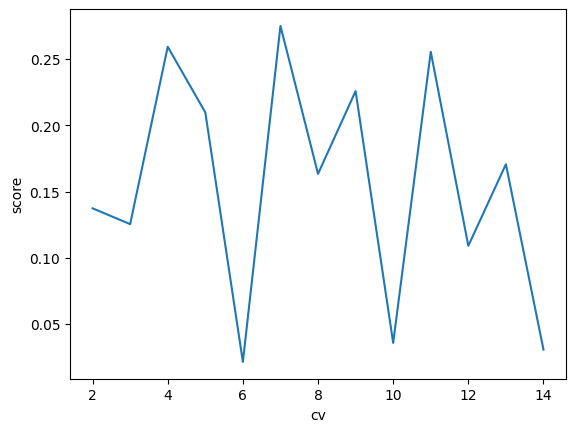

In [554]:
sns.lineplot(x=cv_score_df['cv'],y=cv_score_df['score'])
plt.show()

In [555]:
selected_model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [556]:
#Hyperparameter tuning GridSearcvCV

param_grid = {'alpha': [0.01,0.05,0.1,0.2,0.4,0.5,1.0,10],
 'epsilon': [0.01,0.05,0.1,0.2,0.4,0.5,1.0,10],
 'eta0': [0.01,0.05,0.1,0.2,0.4,0.5,1.0,10],
 'l1_ratio': [0.01,0.05,0.1,0.2,0.4,0.5,1.0,10],
 'max_iter': [100,1000,10000]
 
 
 }



gridcv_model = GridSearchCV(estimator=selected_model, param_grid=param_grid, cv= cv_score_df.iloc[0,0],scoring='r2')
gridcv_model .fit(X_train_sc, y_train_sc)
     
print(gridcv_model .best_params_)
print(gridcv_model .best_score_)

{'alpha': 0.01, 'epsilon': 0.4, 'eta0': 1.0, 'l1_ratio': 0.05, 'max_iter': 10000}
0.37304715608058864
